## Retrieving firms and creating firm list

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
metal = pd.read_csv("Data/Metal.csv")
metal = metal.iloc[:17]
metal = metal[["Company", "Ticker"]]
metal_firm = metal["Ticker"].tolist()

In [3]:
energy = pd.read_csv("Data/Energy.csv")
energy = energy[["HOLDINGS", "TICKER"]]
energy_firm = energy["TICKER"].tolist()

In [4]:
micro = pd.read_csv("Data/Microchips.csv")
micro = micro.iloc[:38]
micro = micro[["Name", "Ticker"]]
micro_firm = micro["Ticker"].tolist()

In [5]:
trans = pd.read_csv("Data/Transport.csv")
trans = trans.iloc[:47]
trans = trans[["Name", "Ticker"]]
trans_firm = trans["Ticker"].tolist()

In [6]:
food = pd.read_csv("Data/Food.csv")
food = food[["SecurityName", "Identifier"]]
food_firm = food["Identifier"].tolist()

## Downloading stock prices

In [7]:
start_date = datetime(2022, 2, 1)
end_date = datetime(2023, 3, 10)


metal_stocks = yf.download(metal_firm, start=start_date, end=end_date)
energy_stocks = yf.download(energy_firm,start=start_date,end=end_date)
micro_stocks = yf.download(micro_firm,start=start_date,end=end_date)
trans_stocks = yf.download(trans_firm,start=start_date,end=end_date)
food_stocks = yf.download(food_firm,start=start_date,end=end_date)

[*********************100%***********************]  17 of 17 completed
[*********************100%***********************]  112 of 112 completed
[*********************100%***********************]  38 of 38 completed
[*********************100%***********************]  47 of 47 completed
[*********************100%***********************]  30 of 30 completed


## Cleaning stock data converting to table

In [8]:
metal_prices = metal_stocks.filter(like='Adj Close')               
metal_prices.columns = metal_prices.columns.get_level_values(1)    
metal_prices =  metal_prices.stack().swaplevel().sort_index().reset_index()
metal_prices.columns = ['Firm','Date','Adj Close']

In [9]:
energy_prices = energy_stocks.filter(like='Adj Close')               
energy_prices.columns = energy_prices.columns.get_level_values(1)    
energy_prices =  energy_prices.stack().swaplevel().sort_index().reset_index()
energy_prices.columns = ['Firm','Date','Adj Close']

In [10]:
micro_prices = micro_stocks.filter(like='Adj Close')               
micro_prices.columns = micro_prices.columns.get_level_values(1)    
micro_prices =  micro_prices.stack().swaplevel().sort_index().reset_index()
micro_prices.columns = ['Firm','Date','Adj Close']

In [11]:
trans_prices = trans_stocks.filter(like='Adj Close')               
trans_prices.columns = trans_prices.columns.get_level_values(1)    
trans_prices =  trans_prices.stack().swaplevel().sort_index().reset_index()
trans_prices.columns = ['Firm','Date','Adj Close']

In [12]:
food_prices = food_stocks.filter(like='Adj Close')               
food_prices.columns = food_prices.columns.get_level_values(1)    
food_prices =  food_prices.stack().swaplevel().sort_index().reset_index()
food_prices.columns = ['Firm','Date','Adj Close']

## Getting daily returns

In [13]:
metal_prices = metal_prices.sort_values(['Firm', 'Date'])
metal_prices['Daily Returns'] = metal_prices.groupby('Firm')['Adj Close'].pct_change()

In [14]:
energy_prices = energy_prices.sort_values(['Firm', 'Date'])
energy_prices['Daily Returns'] = energy_prices.groupby('Firm')['Adj Close'].pct_change()

In [15]:
micro_prices = micro_prices.sort_values(['Firm', 'Date'])
micro_prices['Daily Returns'] = micro_prices.groupby('Firm')['Adj Close'].pct_change()

In [16]:
trans_prices = trans_prices.sort_values(['Firm', 'Date'])
trans_prices['Daily Returns'] = trans_prices.groupby('Firm')['Adj Close'].pct_change()

In [17]:
food_prices = food_prices.sort_values(['Firm', 'Date'])
food_prices['Daily Returns'] = food_prices.groupby('Firm')['Adj Close'].pct_change()

## Downloading SP500 Returns

In [18]:
spy = yf.download('^GSPC', start=start_date, end=end_date)
market_ret = spy.filter(like='Adj Close')               
market_ret = market_ret.stack().swaplevel().sort_index().reset_index()
market_ret.columns = ['Firm','Date','Adj Close']
market_ret['Firm'] = "sp500"
market_ret['Daily Returns'] = market_ret['Adj Close'].pct_change()
market_ret

[*********************100%***********************]  1 of 1 completed


,Firm,Date,Adj Close,Daily Returns
0,sp500,2022-02-01,4546.540039,NaN
1,sp500,2022-02-02,4589.379883,0.009423
2,sp500,2022-02-03,4477.439941,-0.024391
3,sp500,2022-02-04,4500.529785,0.005157
4,sp500,2022-02-07,4483.870117,-0.003702
...,...,...,...,...
272,sp500,2023-03-03,4045.639893,0.016148
273,sp500,2023-03-06,4048.419922,0.000687
274,sp500,2023-03-07,3986.370117,-0.015327
275,sp500,2023-03-08,3992.010010,0.001415


In [19]:
event_date = pd.read_csv("Data/MajorEvents.csv")
event_date['Date'] = pd.to_datetime(event_date['Date'])
event_date

,Date,Event
0,2022-02-24,Invasion Announcement
1,2022-02-25,Ukraine announces it will defend its territory
2,2022-03-02,Refugee Crisis in Poland
3,2022-03-06,Irpin Bridge Evacuation
4,2022-03-09,Mariupol Hospital Attack
5,2022-03-16,Mariupol Theater Bombing
6,2022-04-01,War crimes uncovered
7,2022-04-14,Sunking of Russian main ship
8,2022-05-17,Mariupol Steel Plant Defence
9,2022-09-01,Russian retreat from Kharkiv


## Calculation of excess returns for each industry

In [20]:
metal_excess_returns = metal_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
metal_excess_returns = metal_excess_returns.reset_index()
metal_excess_returns = metal_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})

In [21]:
energy_excess_returns = energy_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
energy_excess_returns = energy_excess_returns.reset_index()
energy_excess_returns = energy_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})

In [22]:
micro_excess_returns = micro_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
micro_excess_returns = micro_excess_returns.reset_index()
micro_excess_returns = micro_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})

In [23]:
trans_excess_returns = trans_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
trans_excess_returns = trans_excess_returns.reset_index()
trans_excess_returns = trans_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})

In [24]:
food_excess_returns = food_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
food_excess_returns = food_excess_returns.reset_index()
food_excess_returns = food_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})

## Calculation of cumulative product/returns for each industry

In [25]:
metal_cum = metal_excess_returns.assign(R=1+metal_excess_returns['Excess Returns']).assign(cumret=lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')

In [26]:
energy_cum = energy_excess_returns.assign(R=1+energy_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')

In [27]:
micro_cum = micro_excess_returns.assign(R=1+micro_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')

In [28]:
trans_cum = trans_excess_returns.assign(R=1+trans_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')

In [29]:
food_cum = food_excess_returns.assign(R=1+food_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')

## Plotting Cumulative Returns

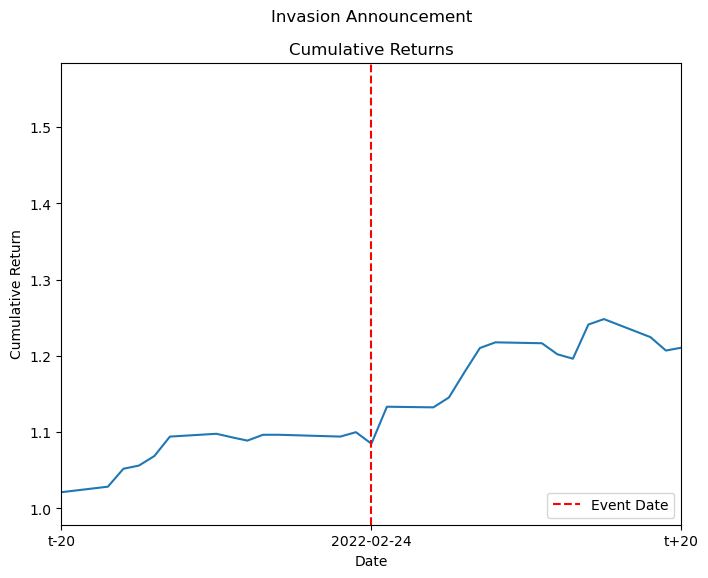

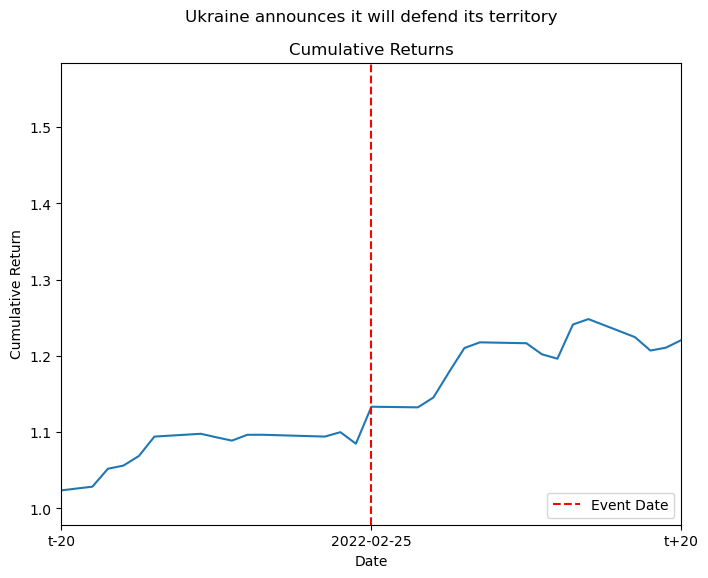

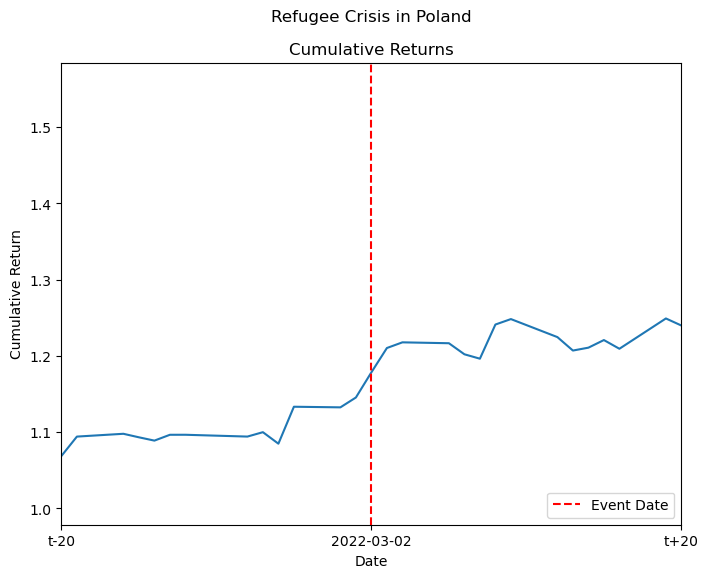

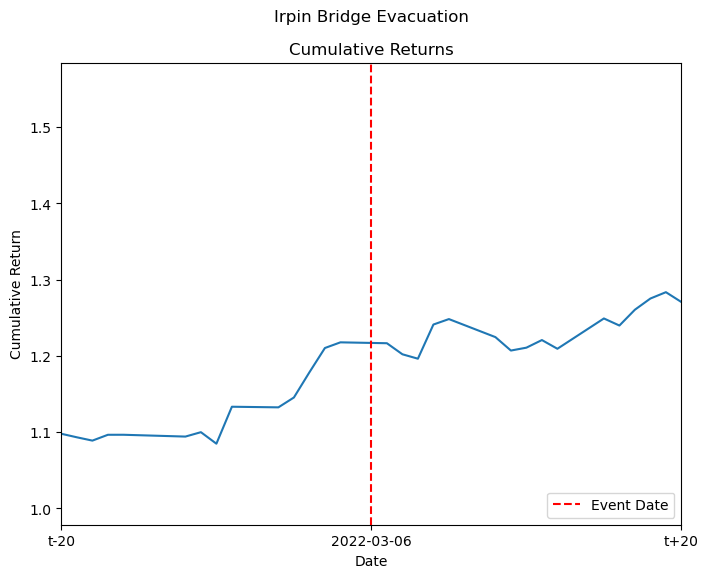

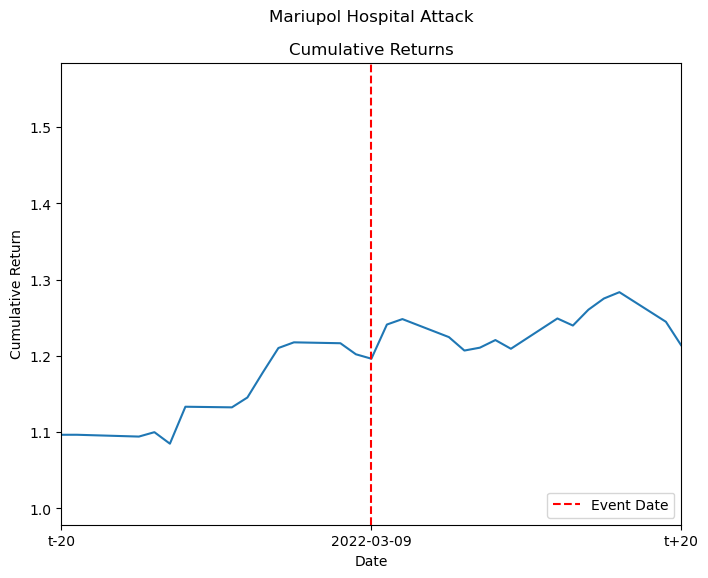

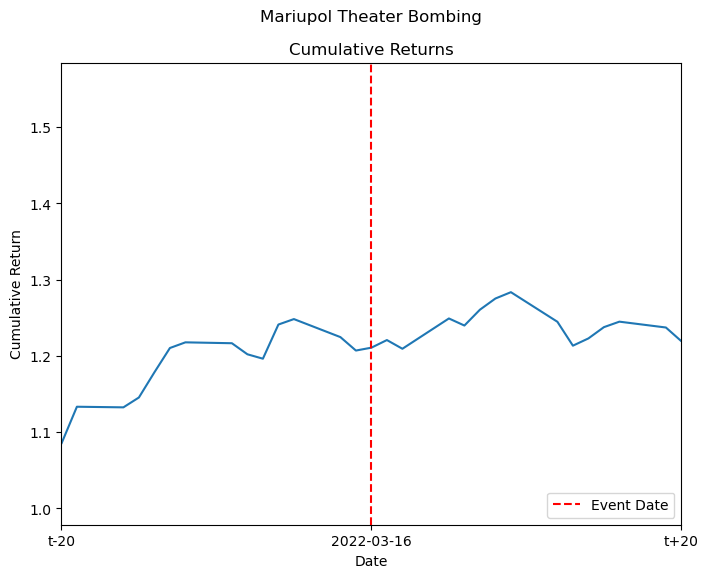

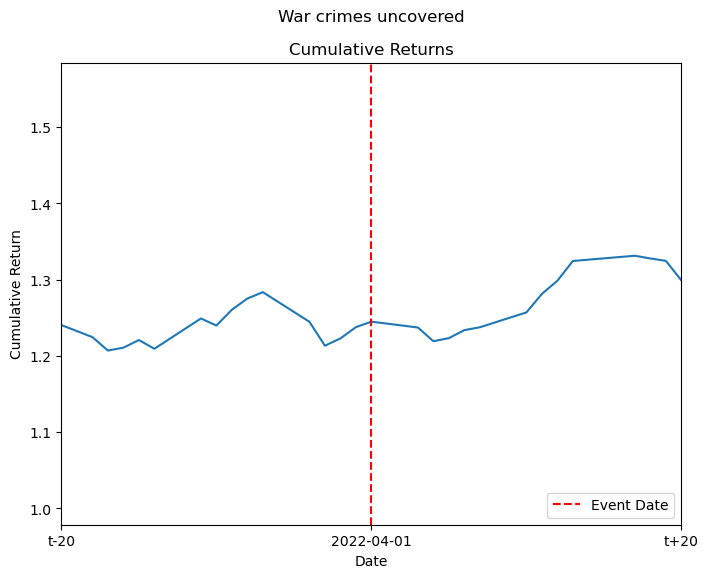

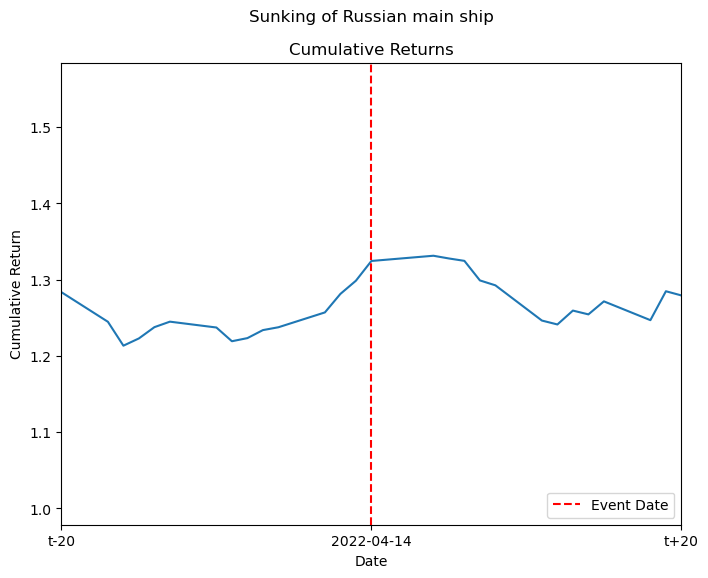

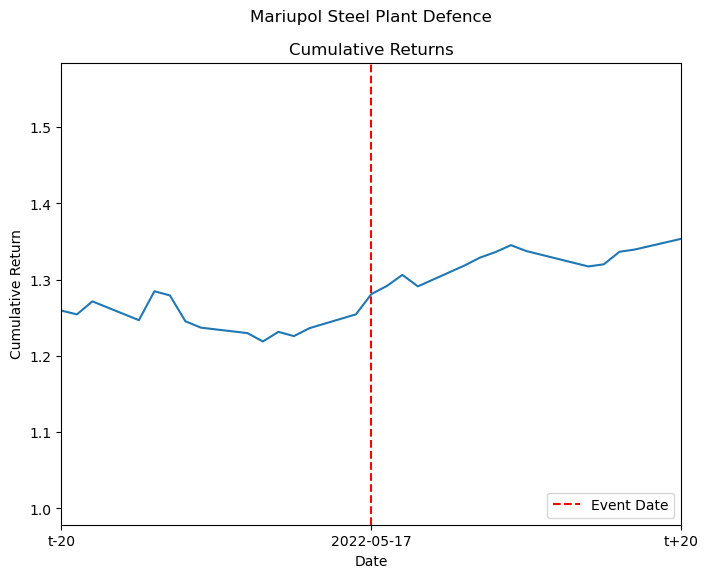

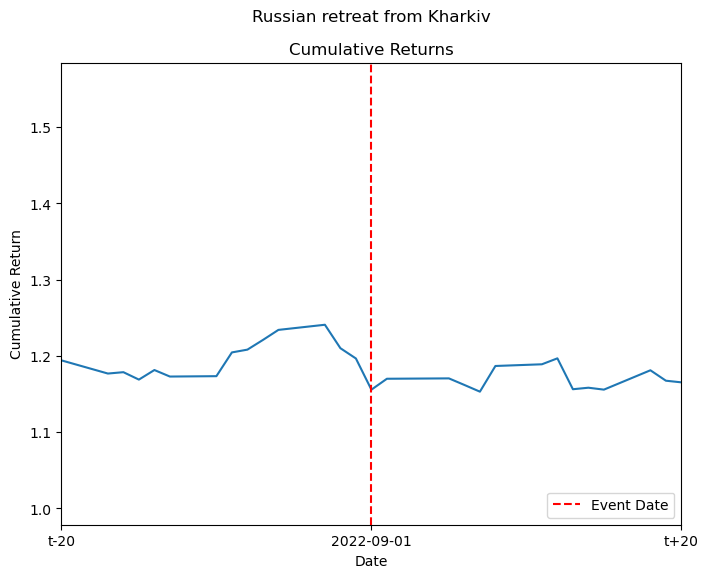

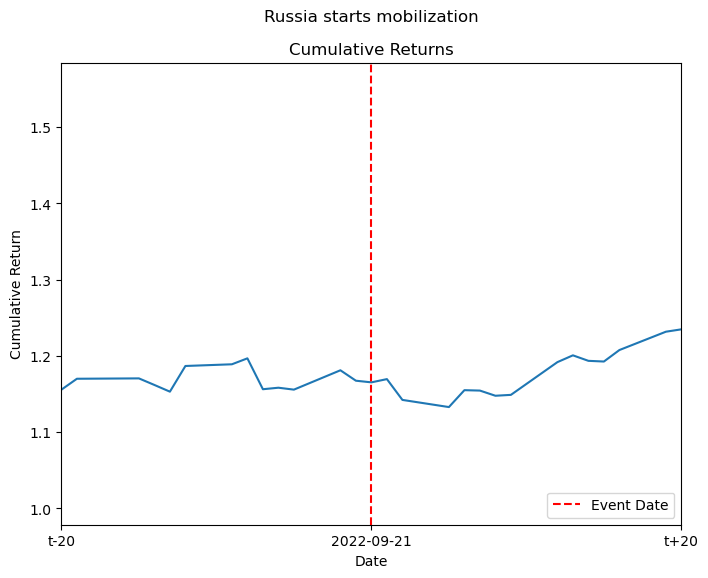

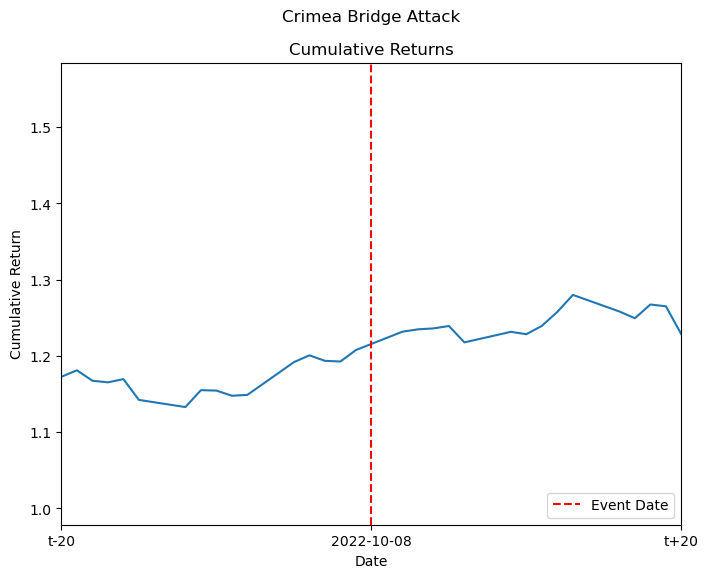

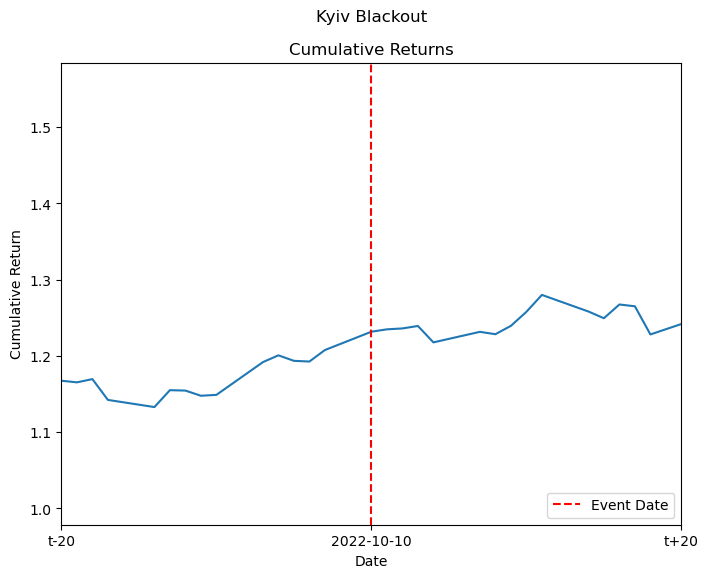

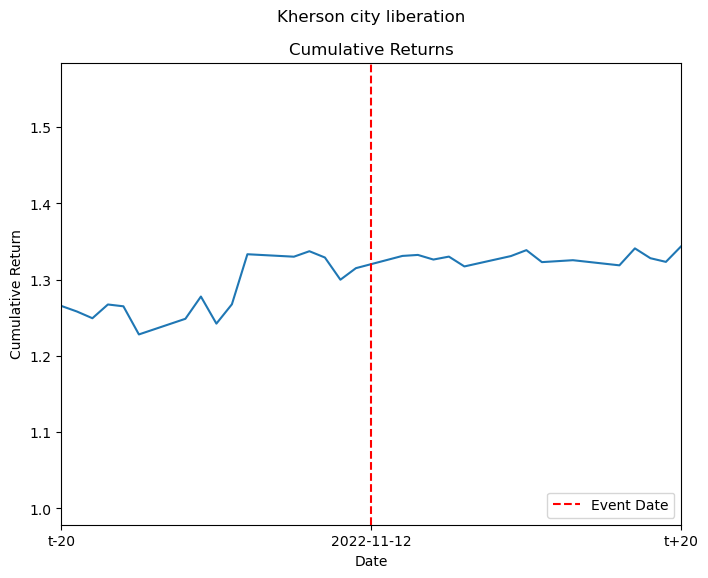

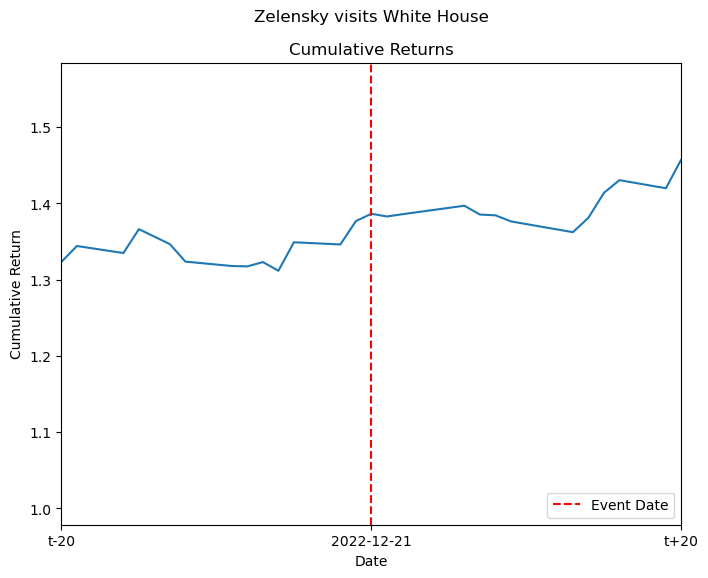

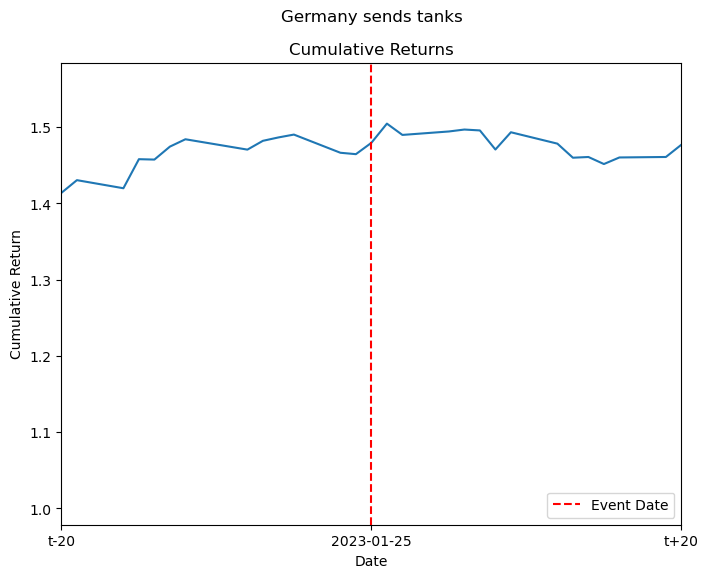

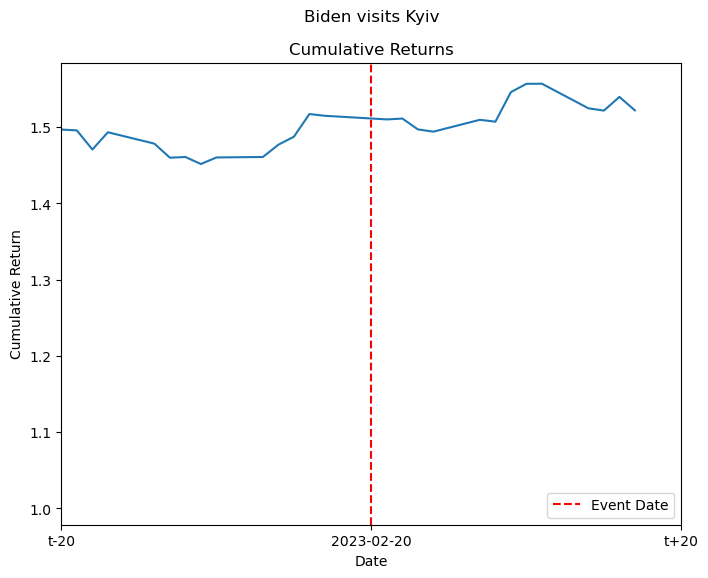

In [30]:
for index, row in event_date.iterrows():
    event = row['Event']
    date = row['Date']

    # set plot size
    plt.figure(figsize=(8, 6))

    # create the line plot
    sns.lineplot(x='Date', y='Cum_ret', data=metal_cum)

    # add vertical line for the date
    plt.axvline(date, color='red', linestyle='--', label='Event Date')

    # set x-axis limits
    plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))

    # set x-axis ticks
    xticks = [date - pd.Timedelta(days=20), date, date + pd.Timedelta(days=20)]
    xticklabels = ['t-20', date.strftime('%Y-%m-%d'), 't+20']
    plt.xticks(xticks, xticklabels)

    # add title and axis labels
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')

    # move the legend to the bottom right corner
    plt.legend(loc='lower right')

    # add text label for the event
    plt.text(date, metal_cum['Cum_ret'].max()*1.05, event, fontsize=12,
             ha='center', va='bottom')

    # show the plot
    plt.show()